In [ ]:
import pandas as pd
import re
import numpy as np
import itertools

In [ ]:
#masukkan dataset yang dibutuhkan dengan alamat penyimpanan yang tepat dan simpan kedalam sebuah variabel
dir = '/content/processed.cleveland.data'
#buatlah iterasi untuk membaca dataset
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]


lines[0:10]

['63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0',
 '67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2',
 '67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1',
 '37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0',
 '41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0',
 '56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0',
 '62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3',
 '57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0',
 '63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2',
 '53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1']

In [ ]:
# Splitting the strings and creating a list of lists
data_list = [line.split(",") for line in lines]

# Replace '?' with NaN
data_list = [[np.nan if x == '?' else x for x in row] for row in data_list]

# Create a Pandas DataFrame
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.DataFrame(data_list, columns=columns)

# Convert columns to numeric (excluding 'sex' and 'target' columns)
numeric_columns = df.columns.difference(['sex', 'target'])
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Display the DataFrame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
df.isnull().sum() * 100 / len(df)

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
target      0.000000
dtype: float64

In [ ]:
# banyak missing value
# slope       64.625850
# ca          98.979592
# thal        90.476190

df=df.drop(columns=['ca', 'thal','slope'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


In [ ]:
# trestbps     0.340136
# chol         7.823129
# fbs          2.721088
# restecg      0.340136
# thalach      0.340136
# exang        0.340136
# do imputation e.g mean median etc

df.dropna(axis=0, subset=['trestbps','chol','fbs','restecg','thalach','exang','ca', 'thal','slope'], inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    object 
dtypes: float64(12), object(2)
memory usage: 33.3+ KB


In [ ]:
# fill nan dengan mean tiap kolom

df['ca']=df['ca'].fillna(df['ca'].mean())
df['thal']=df['thal'].fillna(df['thal'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    object 
dtypes: float64(12), object(2)
memory usage: 33.3+ KB


In [ ]:
# ubah tipe data ke float
df=df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
df = df.drop_duplicates()

In [ ]:
#spliting train dan test
X = df.drop("target",axis=1).values
y = df.iloc[:,-1]

In [ ]:
# cek imbalance 'target'

df['target'].value_counts()

0.0    164
1.0     55
2.0     36
3.0     35
4.0     13
Name: target, dtype: int64

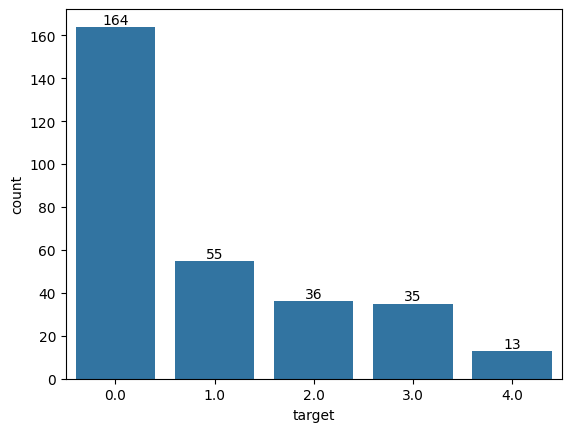

In [ ]:
# visualize
import seaborn as sns

ax=sns.countplot(df, x=df['target'])
ax.bar_label(ax.containers[0], fontsize=10);

In [ ]:
# do over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

Text(0.5, 1.0, 'Sesudah Oversample')

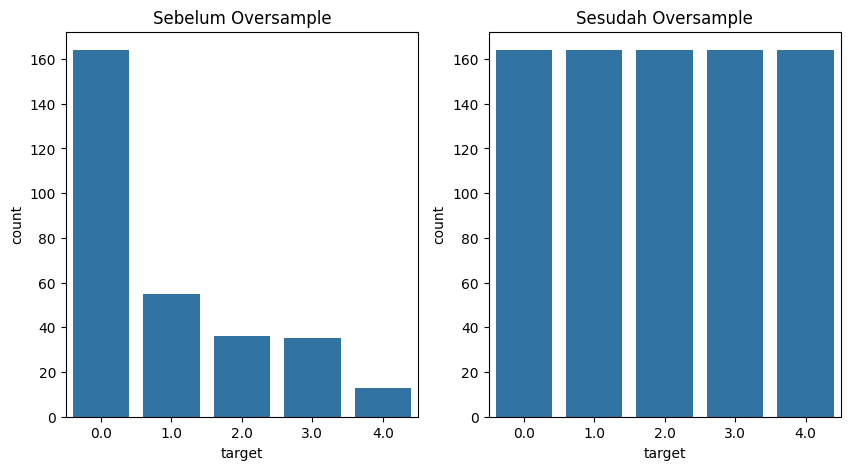

In [ ]:
import matplotlib.pyplot as plt

target_sebelum_SMOTE = y
target_sesudah_SMOTE = y_smote_resampled

fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax=sns.countplot(df, x=target_sebelum_SMOTE,ax=axes[0])
ax.set_title('Sebelum Oversample')

ax=sns.countplot(df, x=target_sesudah_SMOTE,ax=axes[1])
ax.set_title('Sesudah Oversample')

In [ ]:
target_sesudah_SMOTE.value_counts()

0.0    164
2.0    164
1.0    164
3.0    164
4.0    164
Name: target, dtype: int64

In [ ]:
# cek std(standar deviasi)
# jika standar deviasi tinggi, maka data cenderung tersebar lebih luas dari nilai rata-rata, yang menunjukkan variasi yang besar dalam data tersebut
# Semakin dekat standar deviasi ke nol, semakin rendah variabilitas data dan rata-rata semakin dapat diandalkan

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# beberapa std kolom jauh dari nol maka perlu normalisasi
# Normalisasi pada dasarnya adalah teknik perubahan skala yang mana kita merubah nilai dari data kedalam skala diantara 0–1.
# Teknik ini biasa juga disebut sebagai Min-Max scaling.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

820

In [ ]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.564250,0.769188,0.822810,0.373825,0.277953,0.137902,0.571167,0.543945,0.455410,0.249400,0.400091,0.368337,0.646760
std,0.164468,0.381897,0.273123,0.146868,0.114863,0.306699,0.432897,0.158370,0.445808,0.190313,0.267596,0.329867,0.419241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.632300,0.666667,0.264151,0.193878,0.000000,0.000000,0.428043,0.000000,0.096774,0.123135,0.000000,0.139331
50%,0.588341,1.000000,1.000000,0.359142,0.269293,0.000000,0.694927,0.549071,0.338257,0.233860,0.500000,0.333333,0.886716
75%,0.680660,1.000000,1.000000,0.460136,0.356423,0.000000,1.000000,0.670726,1.000000,0.379306,0.500000,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')
  metric_dict={'accuracy': round(acc,3),
  'recall': round(rcl,3),
  'F1 score': round(f1,3),
  'Precision score': round(ps,3)
  }
  return print(metric_dict)

#KNN

In [ ]:
# masuk ke model development
# Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.689
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.48      0.54        33
         1.0       0.59      0.50      0.54        32
         2.0       0.84      0.79      0.81        33
         3.0       0.65      0.85      0.74        33
         4.0       0.73      0.82      0.77        33

    accuracy                           0.69       164
   macro avg       0.69      0.69      0.68       164
weighted avg       0.69      0.69      0.68       164



In [ ]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.689, 'recall': 0.689, 'F1 score': 0.682, 'Precision score': 0.686}


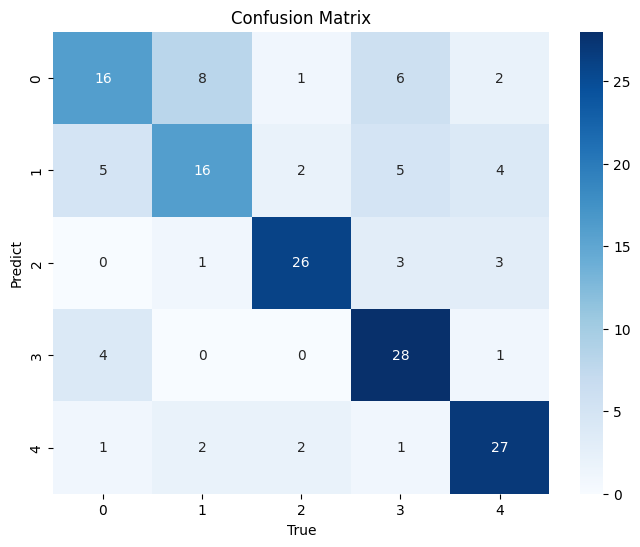

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.902
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        33
         1.0       0.86      0.78      0.82        32
         2.0       0.91      0.94      0.93        33
         3.0       0.94      0.88      0.91        33
         4.0       0.97      1.00      0.99        33

    accuracy                           0.90       164
   macro avg       0.90      0.90      0.90       164
weighted avg       0.90      0.90      0.90       164



In [ ]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.902, 'recall': 0.902, 'F1 score': 0.902, 'Precision score': 0.903}


Text(70.72222222222221, 0.5, 'Predict')

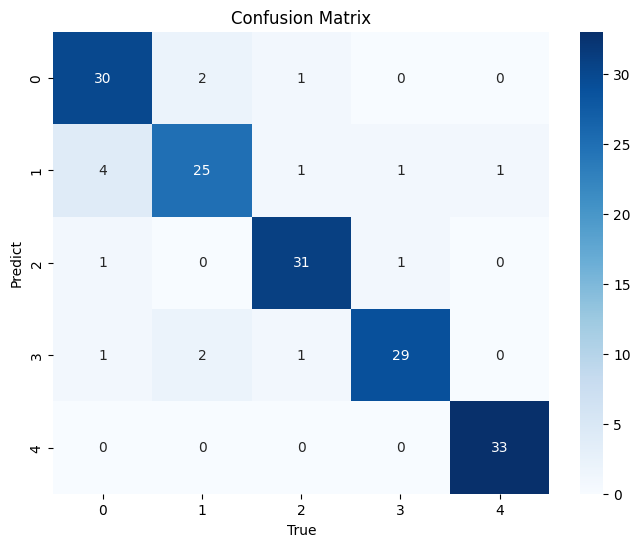

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

#XGB

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.829
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        33
         1.0       0.70      0.66      0.68        32
         2.0       0.86      0.91      0.88        33
         3.0       0.87      0.82      0.84        33
         4.0       0.94      0.97      0.96        33

    accuracy                           0.83       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.83      0.83       164



In [ ]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.829, 'recall': 0.829, 'F1 score': 0.828, 'Precision score': 0.828}


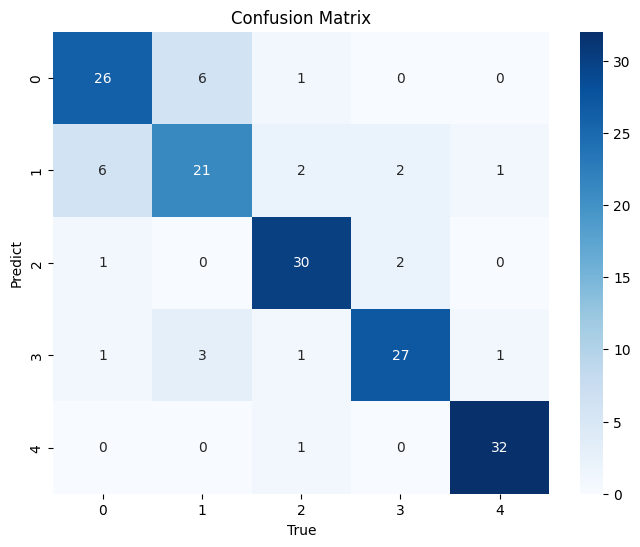

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#KNN+normalisasi

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.823
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81        33
         1.0       0.68      0.72      0.70        32
         2.0       0.87      0.82      0.84        33
         3.0       0.81      0.91      0.86        33
         4.0       0.84      0.97      0.90        33

    accuracy                           0.82       164
   macro avg       0.83      0.82      0.82       164
weighted avg       0.83      0.82      0.82       164



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.823, 'recall': 0.823, 'F1 score': 0.822, 'Precision score': 0.833}


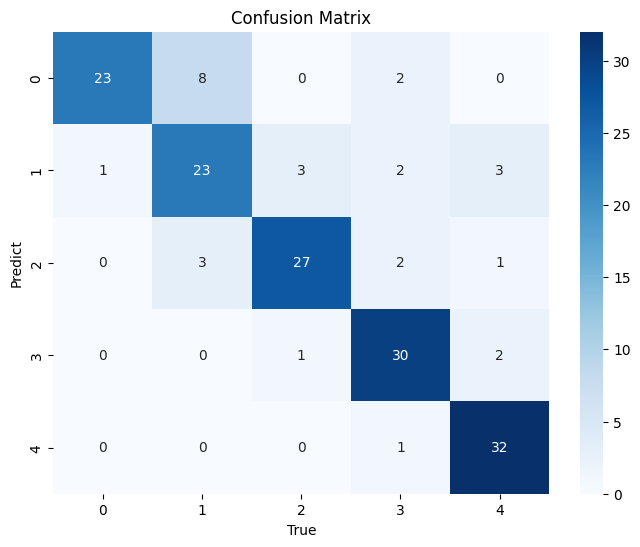

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#Random Forest+normalisasi

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.902
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        33
         1.0       0.86      0.78      0.82        32
         2.0       0.91      0.94      0.93        33
         3.0       0.94      0.88      0.91        33
         4.0       0.97      1.00      0.99        33

    accuracy                           0.90       164
   macro avg       0.90      0.90      0.90       164
weighted avg       0.90      0.90      0.90       164



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.902, 'recall': 0.902, 'F1 score': 0.902, 'Precision score': 0.903}


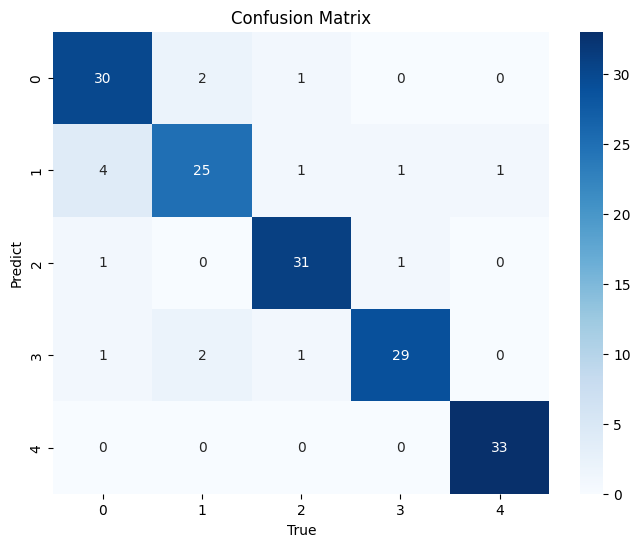

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#XGB+Normalisasi

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.829
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        33
         1.0       0.70      0.66      0.68        32
         2.0       0.86      0.91      0.88        33
         3.0       0.87      0.82      0.84        33
         4.0       0.94      0.97      0.96        33

    accuracy                           0.83       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.83      0.83       164



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.829, 'recall': 0.829, 'F1 score': 0.828, 'Precision score': 0.828}


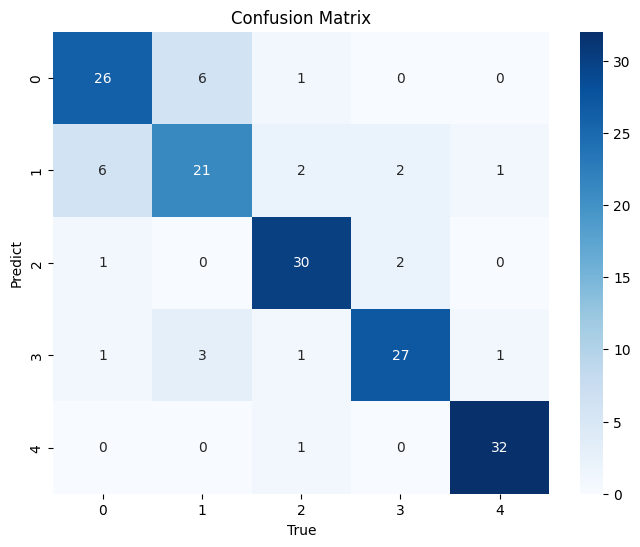

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#KNN+nomalisasi+oversample

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
knn_model = KNeighborsClassifier()
param_grid = {
  "n_neighbors": range(3, 21),
  "metric": ["euclidean", "manhattan", "chebyshev"],
  "weights": ["uniform", "distance"],
  "algorithm": ["auto", "ball_tree", "kd_tree"],
  "leaf_size": range(10, 61),
}
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normal, y_train_normal)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 11, 'algorithm': 'ball_tree'}


In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.878
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84        33
         1.0       0.79      0.69      0.73        32
         2.0       0.86      0.94      0.90        33
         3.0       0.91      0.97      0.94        33
         4.0       0.92      1.00      0.96        33

    accuracy                           0.88       164
   macro avg       0.87      0.88      0.87       164
weighted avg       0.88      0.88      0.87       164



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.878, 'recall': 0.878, 'F1 score': 0.875, 'Precision score': 0.875}


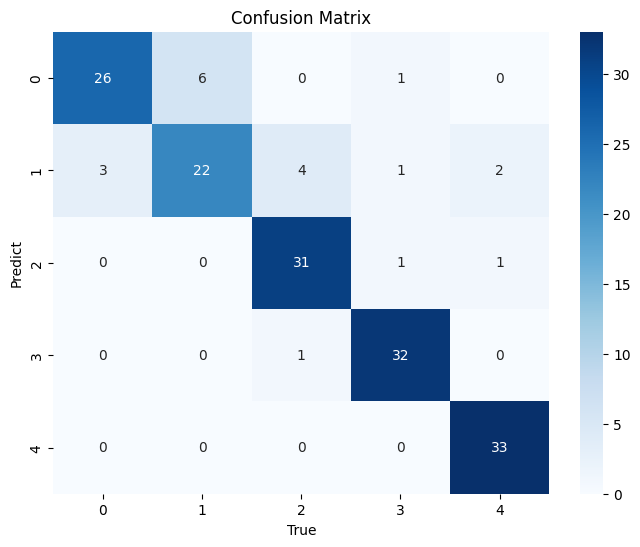

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#Random Forest+normalisasi+oversample

In [ ]:
rf_model = RandomForestClassifier()
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"]
# "random_state": [42, 100, 200]
}
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.872
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        33
         1.0       0.79      0.72      0.75        32
         2.0       0.81      0.91      0.86        33
         3.0       0.94      0.88      0.91        33
         4.0       1.00      0.97      0.98        33

    accuracy                           0.87       164
   macro avg       0.87      0.87      0.87       164
weighted avg       0.87      0.87      0.87       164



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.872, 'recall': 0.872, 'F1 score': 0.872, 'Precision score': 0.874}


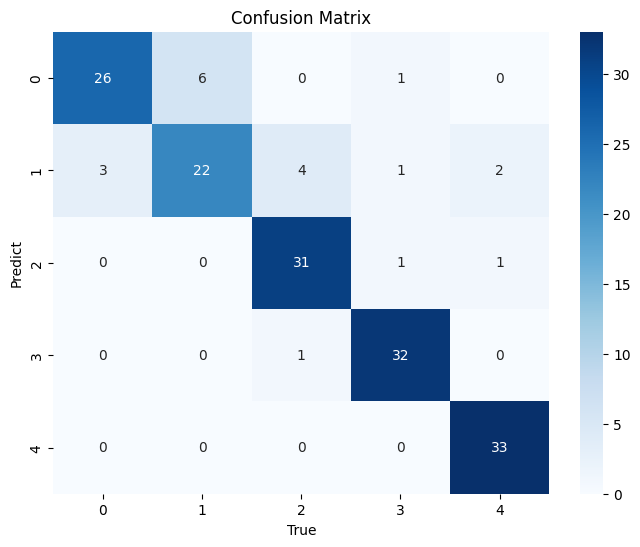

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#XGB+Normalisasi+oversample

In [ ]:
xgb_model = XGBClassifier()
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normal, y_train_normal)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.835
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81        33
         1.0       0.74      0.72      0.73        32
         2.0       0.86      0.91      0.88        33
         3.0       0.90      0.79      0.84        33
         4.0       0.89      0.94      0.91        33

    accuracy                           0.84       164
   macro avg       0.84      0.83      0.83       164
weighted avg       0.84      0.84      0.83       164



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.835, 'recall': 0.835, 'F1 score': 0.834, 'Precision score': 0.836}


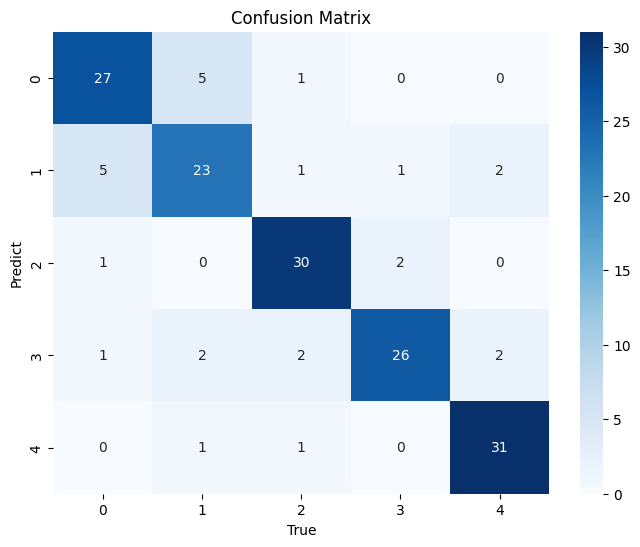

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
import pickle

with open('rf_normalisasi_oversample_tuning.pkl', 'wb') as files:
    pickle.dump(rf_model, files)

In [ ]:
with open('rf_normalisasi_oversample_tuning.pkl', 'rb') as files:
    pickle.load(files)

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
dfcek1.to_csv('dataq.csv', index=False)